### Example SA200 Raspberry PI-2w, Slitless Spectrograph rotate

- Read packages

In [15]:
import time
import json
from ciboulette.indiclient.spectrograph import SPECTROGRAPHsa200

- Create SPECTROGRAPHsa200 class

In [16]:
sp = SPECTROGRAPHsa200(host='192.168.1.40',port=7624)

- Minimum and maximum coverage spectrum (Nanometers)

In [3]:
sp.set_coverage(400,700)

(400, 700)

- Read blocks of SA200 indilib driver (indi Filterwheel)

In [45]:
sp.get_blocks()

['-75', '200', '20.5', '2', 'SA200_178MM_F200', '650', '670', '0', '0', '0']

- Read degree, R, length, speed and blocks of SA200 indilib driver (indi Filterwheel) and translate json format (degree, R, length and speed are reserved)
- Edit slot value, degree, R, length, speed, block5 and block6 for example in json format.

In [43]:
sp.datastream()

'{ "SA200":{ "value":"3", "degree":"-75", "R":"200", "length":"20.5", "speed":"2", "block05":"SA200_178MM_F200", "block06":"650", "block07":"670", "block08":"0", "block09":"0", "block10":"0" } }'

In [44]:
data = json.loads(sp.datastream())
data['SA200']['value'],data['SA200']['degree'],data['SA200']['R'],data['SA200']['block05'],data['SA200']['block06'],

('3', '-75', '200', 'SA200_178MM_F200', '650')

- Get slot value (1 to 10). 

1 - Initialization degree and motor run

2 - Initialization R

3 - Initialization Length

4 - Initialization Speed

In [16]:
sp.get_slot_value()

1

- Init R value, (default = 200)

In [7]:
sp.set_R(200)

True

- Init length between sa 200 and CCD/CMOS (default=20.5)

In [41]:
sp.set_length(20.5)

True

- Set instruments names

In [ ]:
sp.set_name('SA200_178MM_F200')

- Init coverage with values. Number block 6 and 7
- Compute dispersion and coverage (nanomètre) with pixel size.

In [42]:
sp.set_coverage(650,670)
sp.datastream()

'{ "SA200":{ "value":"3", "degree":"-75", "R":"200", "length":"20.5", "speed":"2", "block05":"SA200_178MM_F200", "block06":"650", "block07":"670", "block08":"0", "block09":"0", "block10":"0" } }'

In [34]:
sp.dispersion(2.4)

0.5454545454545454

In [33]:
sp.get_coverage(2.4)

(1191, 1228)

- Save the indi_sa200 config on the driver. "SPECTROGRAPHsa200.load" read the driver configuration

In [40]:
sp.save()

True

- Exemple for moving the motor.

In [31]:
 for i in range(1,2):
    sp.set_speed(1)
    sp.set_degree(45)
    sp.set_degree(-90) 
    sp.set_degree(75) 
    sp.motor()


In [38]:
for i in range(1,5):
    sp.set_degree(-75)

In [10]:
sp.set_degree(0)

True

In [39]:
sp.set_speed(6)
sp.motor()
sp.set_speed(2)
sp.motor()

'-75'

In [23]:
sp.motor_out()

'0'

- Shemas and wiringPi GPIO module.

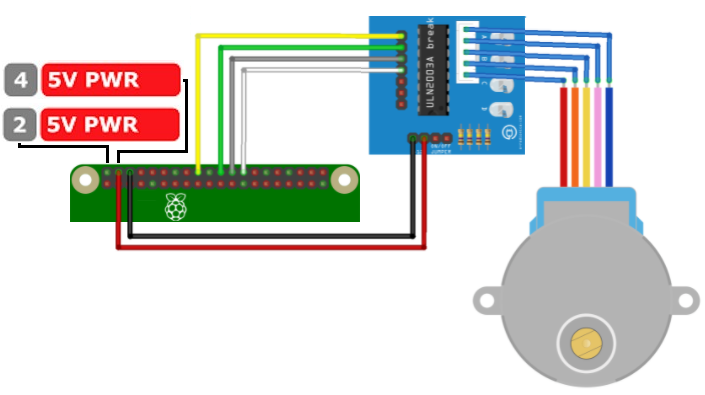

In [35]:
sp.shemas()

In [36]:
sp.GPIO()

 +-----+-----+---------+------+---+----++----+---+------+---------+-----+-----+
 | BCM | wPi |   Name  | Mode | V | Physical | V | Mode | Name    | wPi | BCM |
 +-----+-----+---------+------+---+----++----+---+------+---------+-----+-----+
 |     |     |    3.3v |      |   |  1 || 2  |   |      | 5v      |     |     |
 |   2 |   8 |   SDA.1 | ALT0 | 1 |  3 || 4  |   |      | 5v      |     |     |
 |   3 |   9 |   SCL.1 | ALT0 | 1 |  5 || 6  |   |      | 0v      |     |     |
 |   4 |   7 | GPIO. 7 |   IN | 1 |  7 || 8  | 1 | ALT5 | TxD     | 15  | 14  |
 |     |     |      0v |      |   |  9 || 10 | 1 | ALT5 | RxD     | 16  | 15  |
 |  17 |   0 | GPIO. 0 |   IN | 0 | 11 || 12 | 0 | IN   | GPIO. 1 | 1   | 18  |
 |  27 |   2 | GPIO. 2 |   IN | 0 | 13 || 14 |   |      | 0v      |     |     |
 |  22 |   3 | GPIO. 3 |   IN | 0 | 15 || 16 | 0 | IN   | GPIO. 4 | 4   | 23  |
 |     |     |    3.3v |      |   | 17 || 18 | 0 | OUT  | GPIO. 5 | 5  *| 24  |
 |  10 |  12 |    MOSI | ALT0 | 0 | 19 |